Test data shape: (12000, 3072)
Test labels shape: (12000, 10)
375/375 - 17s - 44ms/step - accuracy: 0.9858 - loss: 0.0360
测试集损失: 0.036017660051584244
测试集准确率: 0.9857500195503235
375/375 - 18s - 47ms/step - accuracy: 0.9858 - loss: 0.0360

Test accuracy: 0.9857500195503235
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      0.99      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200
           6       0.99      0.99      0.99      1200
           7       1.00      1.00      1.00      1200
           8       0.94      0.94      0.94      1200
           9       0.94      0.95      0.94      1200

    accuracy                           0.99     12000
   macro avg       0.99      0.99  

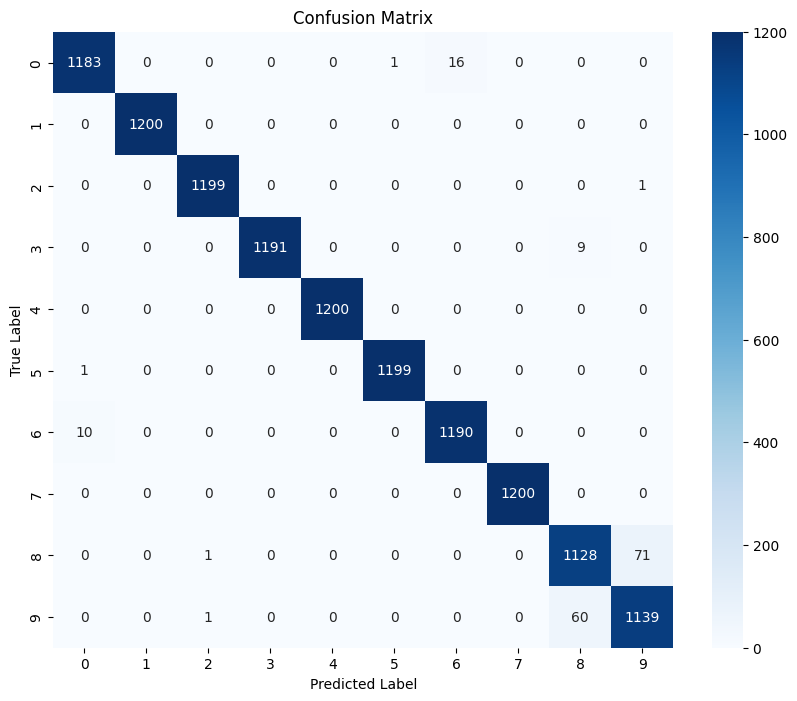

In [1]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 52ms/step - accuracy: 0.9435 - loss: 0.1383
测试集损失: 0.1382666677236557
测试集准确率: 0.9434999823570251
63/63 - 3s - 44ms/step - accuracy: 0.9435 - loss: 0.1383

Test accuracy: 0.9434999823570251
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       200
           1       1.00      1.00      1.00       200
           2       0.99      0.99      0.99       200
           3       1.00      0.95      0.98       200
           4       1.00      1.00      1.00       200
           5       0.99      0.99      0.99       200
           6       0.93      0.96      0.95       200
           7       1.00      1.00      1.00       200
           8       0.78      0.79      0.78       200
           9       0.79      0.81      0.80       200

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94     

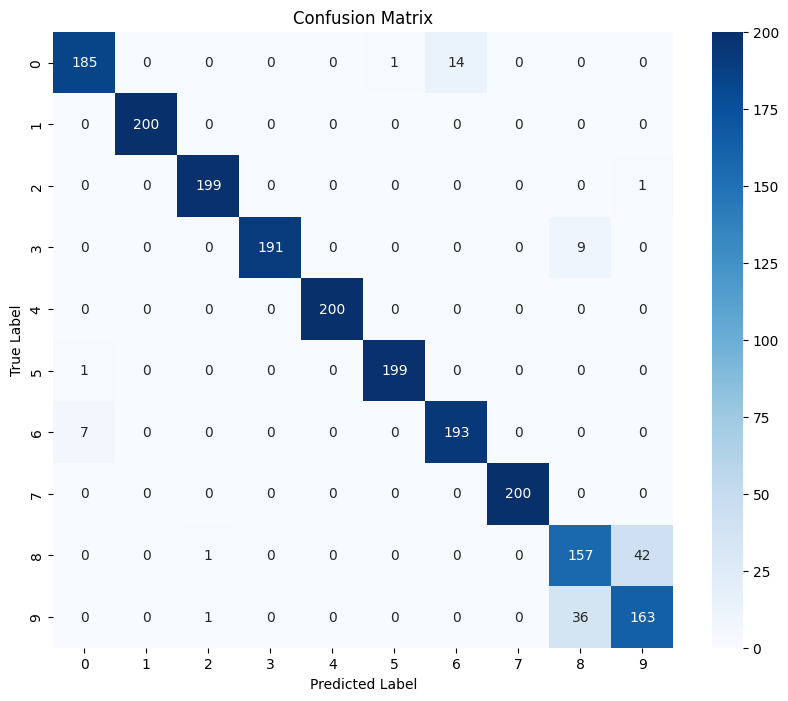

In [2]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_5'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 52ms/step - accuracy: 0.9790 - loss: 0.0662
测试集损失: 0.06620554625988007
测试集准确率: 0.9789999723434448
63/63 - 3s - 55ms/step - accuracy: 0.9790 - loss: 0.0662

Test accuracy: 0.9789999723434448
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       0.99      0.98      0.99       200
           7       1.00      1.00      1.00       200
           8       0.92      0.89      0.91       200
           9       0.89      0.93      0.91       200

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98    

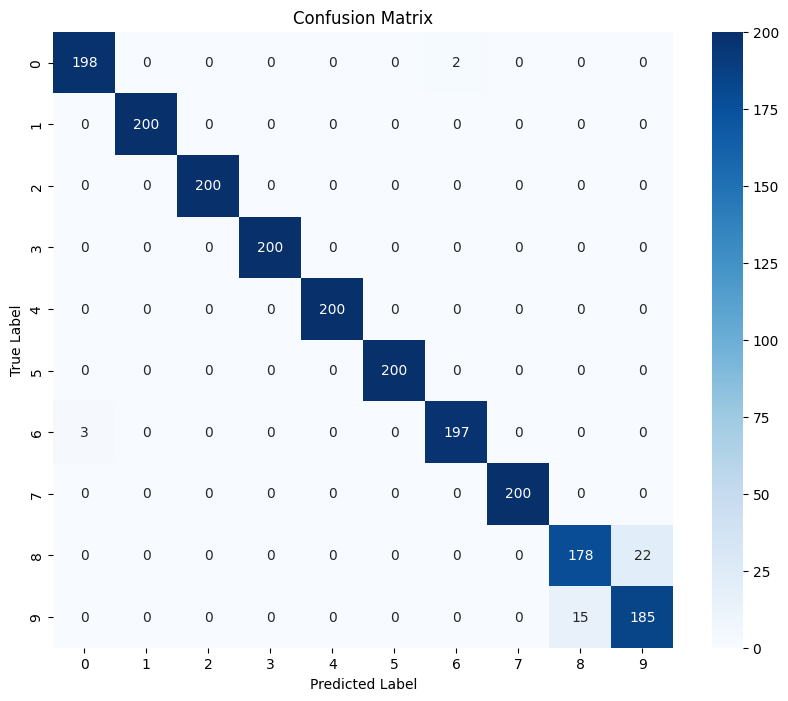

In [3]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_10'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 50ms/step - accuracy: 0.9945 - loss: 0.0131
测试集损失: 0.013075067661702633
测试集准确率: 0.9944999814033508
63/63 - 3s - 49ms/step - accuracy: 0.9945 - loss: 0.0131

Test accuracy: 0.9944999814033508
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       0.97      0.97      0.97       200
           9       0.97      0.97      0.97       200

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99   

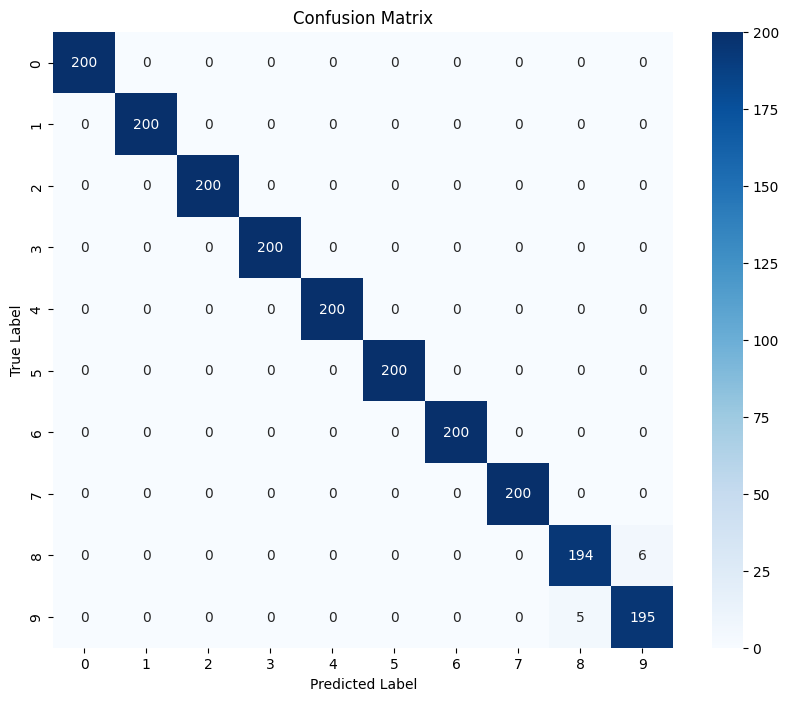

In [4]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_15'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 48ms/step - accuracy: 0.9980 - loss: 0.0035
测试集损失: 0.003505285829305649
测试集准确率: 0.9980000257492065
63/63 - 3s - 45ms/step - accuracy: 0.9980 - loss: 0.0035

Test accuracy: 0.9980000257492065
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       0.99      0.99      0.99       200
           9       0.99      0.98      0.99       200

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00   

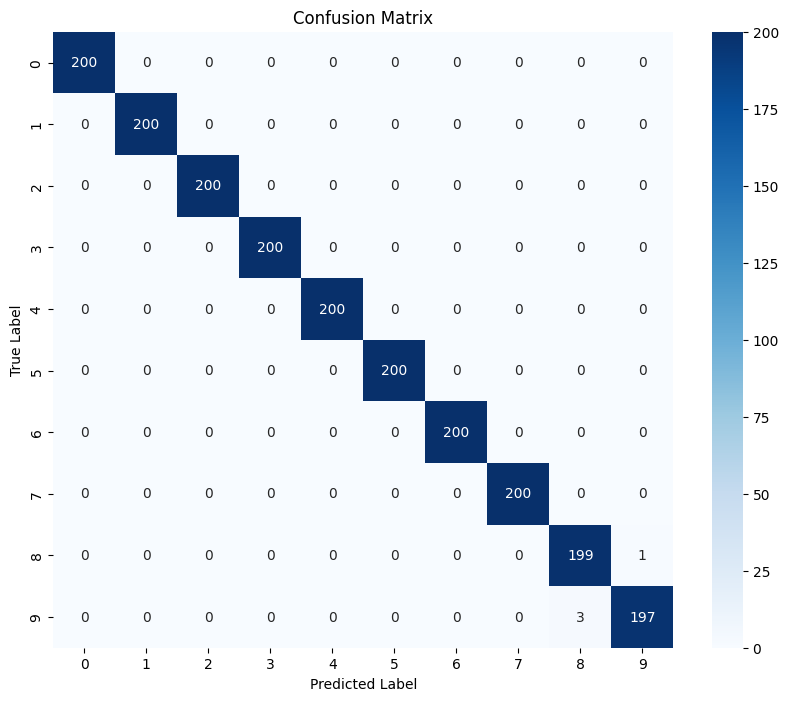

In [5]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_20'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 54ms/step - accuracy: 0.9995 - loss: 0.0015
测试集损失: 0.0014995471574366093
测试集准确率: 0.9994999766349792
63/63 - 3s - 46ms/step - accuracy: 0.9995 - loss: 0.0015

Test accuracy: 0.9994999766349792
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       1.00      0.99      1.00       200

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00  

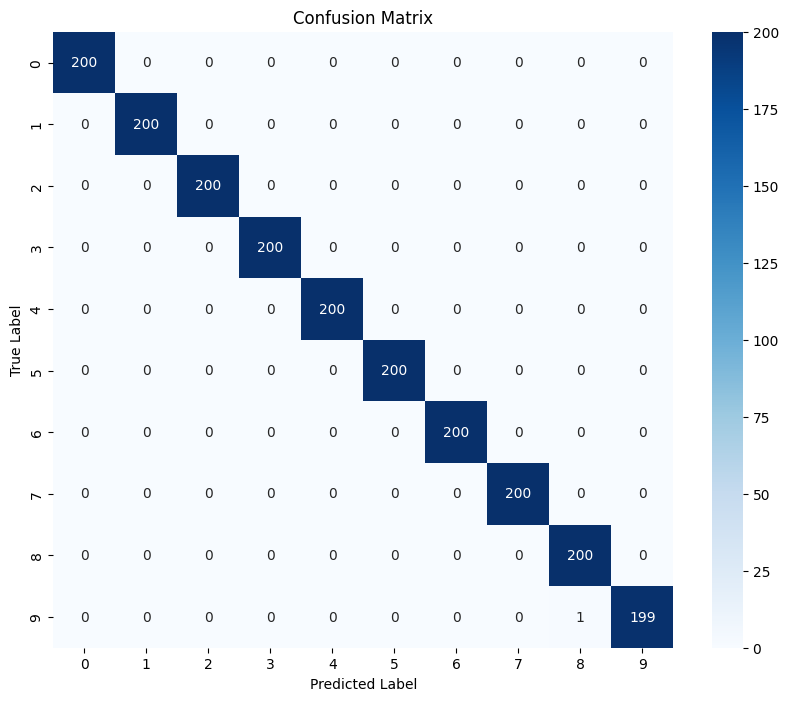

In [6]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_25'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Test data shape: (2000, 3072)
Test labels shape: (2000, 10)
63/63 - 3s - 53ms/step - accuracy: 1.0000 - loss: 0.0013
测试集损失: 0.0012908660573884845
测试集准确率: 1.0
63/63 - 3s - 43ms/step - accuracy: 1.0000 - loss: 0.0013

Test accuracy: 1.0
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       200
           7       1.00      1.00      1.00       200
           8       1.00      1.00      1.00       200
           9       1.00      1.00      1.00       200

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.

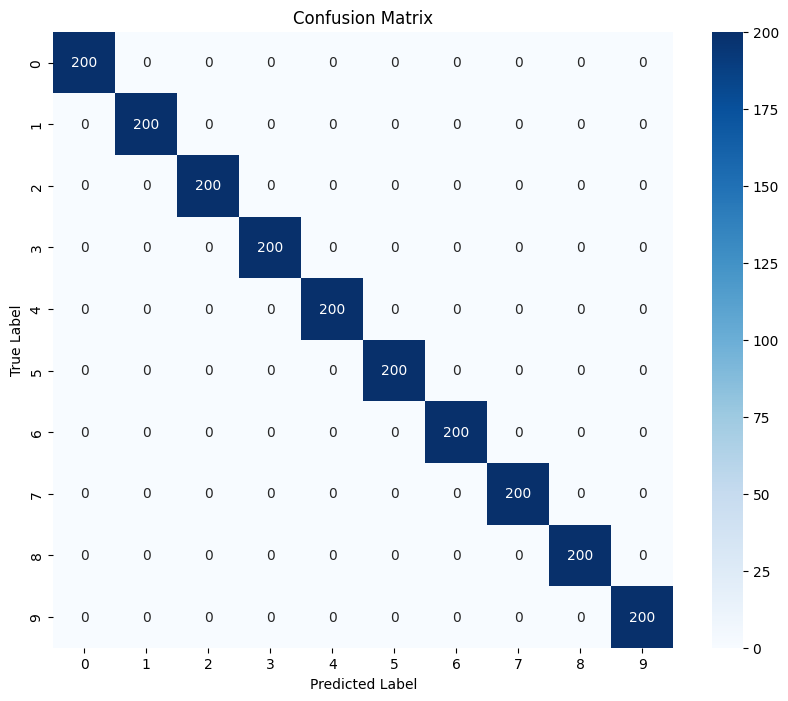

In [7]:
import scipy.io
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def load_data_from_mat(path):
    train_data = []
    train_labels = []
    test_data = []
    test_labels = []

    for file in os.listdir(path):
        if file.startswith('test_30'):
            mat = scipy.io.loadmat(os.path.join(path, file))
            test_data.append(mat[list(mat.keys())[-2]])
            test_labels.append(mat[list(mat.keys())[-1]])

    # Concatenate all data and labels respectively
    test_data = np.concatenate(test_data, axis=0)
    test_labels = np.concatenate(test_labels, axis=0)

    # Normalize data
    test_data = test_data.astype('float32') / 255

    # Convert labels to categorical (one-hot encoding)
    test_labels = to_categorical(test_labels, 10)

    return test_data, test_labels

# 调用函数加载数据
path = '/Users/fuyao/Desktop/Thesis/about_database/generate_database'
test_data, test_labels = load_data_from_mat(path)


print('Test data shape:', test_data.shape)
print('Test labels shape:', test_labels.shape)

test_data_reshaped = test_data.reshape((-1, 32, 32, 3))

loaded_model = tf.keras.models.load_model('/Users/fuyao/Documents/GitHub/DL-based-RF-Fingerprints-Recognition/model/vggNet0330-1.h5')
# 评估模型在测试集上的性能
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)

print(f'测试集损失: {test_loss}')
print(f'测试集准确率: {test_acc}')

# 确保在这里使用测试数据和测试标签
test_loss, test_acc = loaded_model.evaluate(test_data_reshaped, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# 预测测试数据集
predictions = loaded_model.predict(test_data_reshaped)
predicted_classes = np.argmax(predictions, axis=1)

# 计算并显示分类报告
report = classification_report(test_labels.argmax(axis=1), predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

# 计算并绘制混淆矩阵
conf_matrix = confusion_matrix(test_labels.argmax(axis=1), predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

